# Classification Project

## File IO

Only File IO...

You may not change this code.

In [1]:
from tkinter.filedialog import askopenfilename
import pandas as pd
import tkinter
import os

# tk_window = tkinter.Tk()
# cwd = os.getcwd()

# tr_data = pd.read_csv(askopenfilename(title='Choose your training data'))

# tr_ans = pd.read_csv(askopenfilename(title='Choose your training answer'))

# tr_ans = tr_ans.iloc[:, 0]

# ts_data = pd.read_csv(askopenfilename(title='Choose your test data'))

# tk_window.destroy()

data_path = ['../../13week_project_data/Wine_Quality_Data']
x_file_path = os.sep.join(data_path + ['data.csv'])
x_data = pd.read_csv(x_file_path)

y_file_path = os.sep.join(data_path + ['answer.csv'])
y_data = pd.read_csv(y_file_path)

y_data = y_data.iloc[:, 0]

# drop columns
x_data.drop(['quality'], axis=1, inplace=True)


In [2]:
from sklearn.model_selection import train_test_split
# Split as train data and test data
tr_data, ts_data, tr_ans, ts_ans = train_test_split(x_data, y_data, test_size=0.2, shuffle=True)

In [3]:
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

C:\Users\Susan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

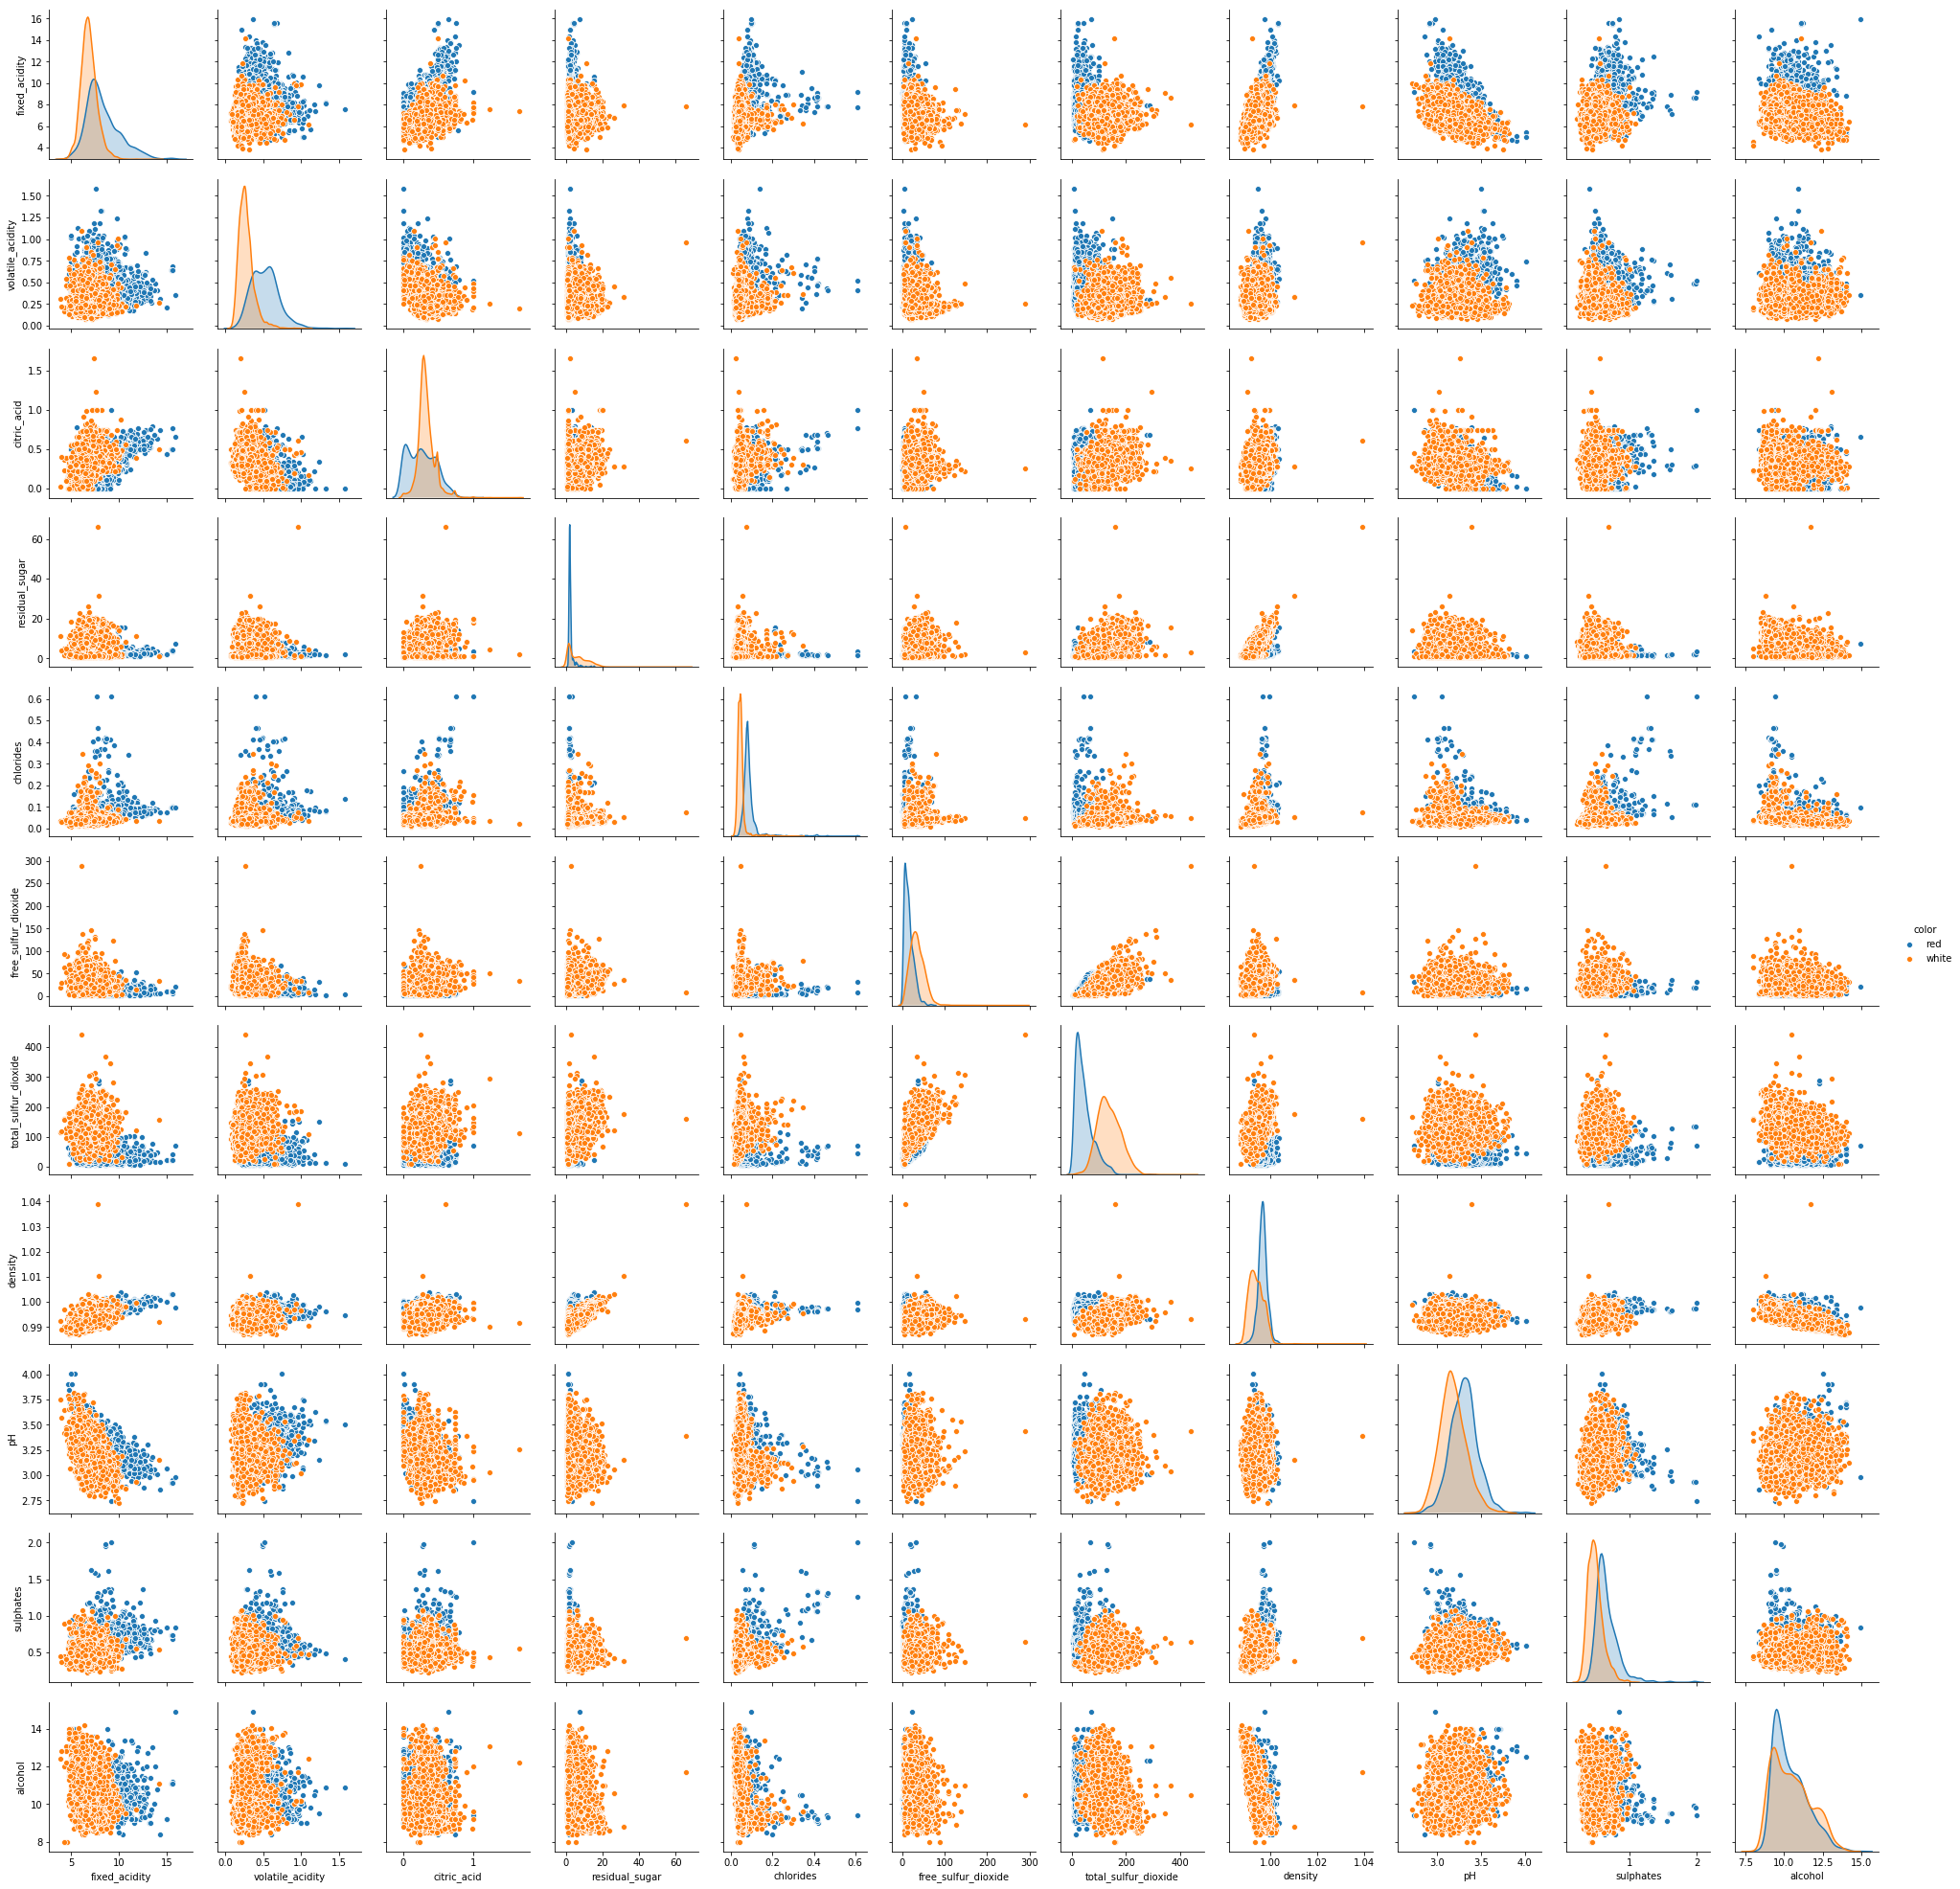

AttributeError: 'NoneType' object has no attribute 'plt'

In [7]:
data_path2 = ['../../data']
file_path = os.sep.join(data_path2 + ['Wine_Quality_Data.csv'])
data = pd.read_csv(file_path)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove extraneous columns
# data.drop(['free_sulfur_dioxide', 'residual_sugar', 'fixed_acidity',  'alcohol', 'quality',
#            'pH', 'sulphates', 'citric_acid', 'volatile_acidity', 'chlorides', 'density'], 
#           axis=1, inplace=True)
data.drop(['quality'], axis=1, inplace=True)


plt.figure()
sns.pairplot(data, hue = "color")
plt.show().plt.figure()
dataset.boxplot(by="color", figsize=(15, 10))
plt.show()

# plt.figure()
# data.boxplot(by="color", figsize=(15, 10))
# plt.show()

## Predict Algorithm

Type your source code (Champion Algorithm)

In [ ]:
# data_df = pd.DataFrame(ts_data)
# data_df.to_csv("Iris_ts_data.csv", mode='w')
# ans_df = pd.DataFrame(ts_ans)
# ans_df.to_csv("Iris_ts_ans.csv", mode='w')

# # KNN, neighbors=5
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN = KNN.fit(tr_data, tr_ans)
y_pred = KNN.predict(ts_data)

# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_KNN5.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # GNB
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb = gnb.fit(tr_data, tr_ans)
# y_pred = gnb.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_GNB.csv", mode='w')
# print(accuracy(ts_ans, y_pred))
               
# # SVM
# from sklearn.svm import LinearSVC
# LinSVC = LinearSVC()
# LinSVC = LinSVC.fit(tr_data, tr_ans)
# y_pred = LinSVC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_SVM.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # Bagging
# from sklearn.ensemble import BaggingClassifier
# BC = BaggingClassifier(n_estimators=50)
# BC = BC.fit(tr_data, tr_ans)
# y_pred = BC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_Bagging.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # RandomForest
# from sklearn.ensemble import RandomForestClassifier
# RF = RandomForestClassifier()
# RF = RF.fit(tr_data, tr_ans)
# y_pred = RF.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_RF.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # GradientBoosting
# from sklearn.ensemble import GradientBoostingClassifier
# GBC = GradientBoostingClassifier()
# GBC = GBC.fit(tr_data, tr_ans)
# y_pred = GBC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_GB.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # AdaBoosting
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# ABC = AdaBoostClassifier()
# ABC = ABC.fit(tr_data, tr_ans)
# y_pred = ABC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_AB.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("output.csv", mode='w')

# End of Demo

## Check Accuracy

Only for check accuracy

In [ ]:
# def accuracy(real, predict):
#     return sum(real == predict) / float(real.shape[0])

# tk_window = tkinter.Tk()
# cwd = os.getcwd()
# ts_ans = pd.read_csv(askopenfilename(title='Choose your test answer'))
# ts_ans = ts_ans.iloc[:, 0]
# tk_window.destroy()

print(accuracy(ts_ans, y_pred))